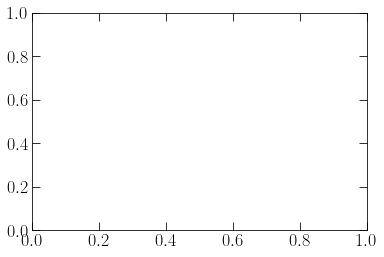

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='major', labelsize=18)

## Pulse Width

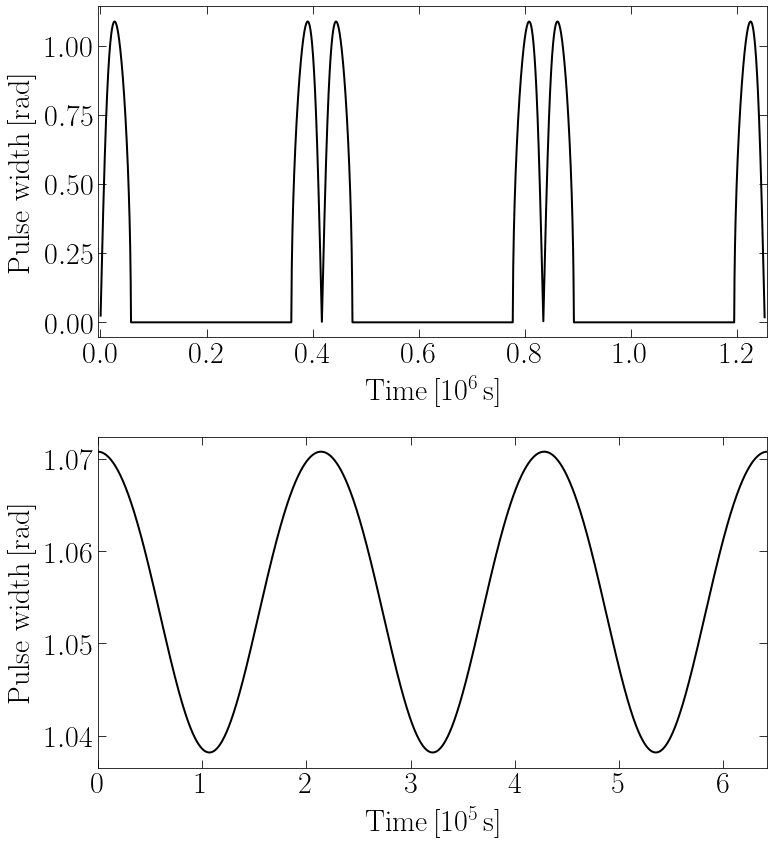

In [11]:
from matplotlib.pyplot import MultipleLocator
fig, (ax2, ax3) = plt.subplots(2, sharex=False,  sharey=False, figsize=(12,14))
plt.subplots_adjust(hspace=0.3)


data1 = np.genfromtxt('data/width_large.dat')
t=data1[:,0]
hp1=data1[:,1]

ax2.plot(t/1e6, hp1, linewidth=2, color='k')
ax2.set_xlim(-0.005,1.25668)
ax2.set_ylabel(r'$\rm{Pulse\,\, width\,[\rm{rad}]}$', fontsize=30)
ax2.set_xlabel(r'$\rm{Time\,[10^{6}\,s]}$',fontsize=30)

data2 = np.genfromtxt('data/width_small.dat')
t=data2[:,0]
hp1=data2[:,1]
# hc1=data2[:,2]
ax3.plot(t/1e5, hp1, linewidth=2,color='k')
# ax3.plot(t, hc1, linewidth=1.5)
ax3.set_xlabel(r'$\rm{Time\,[10^{5}\,s]}$',fontsize=30)
ax3.set_ylabel(r'$\rm{Pulse\,\, width\,[\rm{rad}]}$', fontsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax3.set_xlim(0,6.422)
# plt.legend(fontsize=20)
# fig.text(0.01, 0.5,r'\rm{Pulse width\,[\rm{rad}]}', va='center', rotation='vertical',fontsize=30)
fig.align_labels()
plt.savefig("image/fig_timing_width.pdf", format='pdf', bbox_inches="tight")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


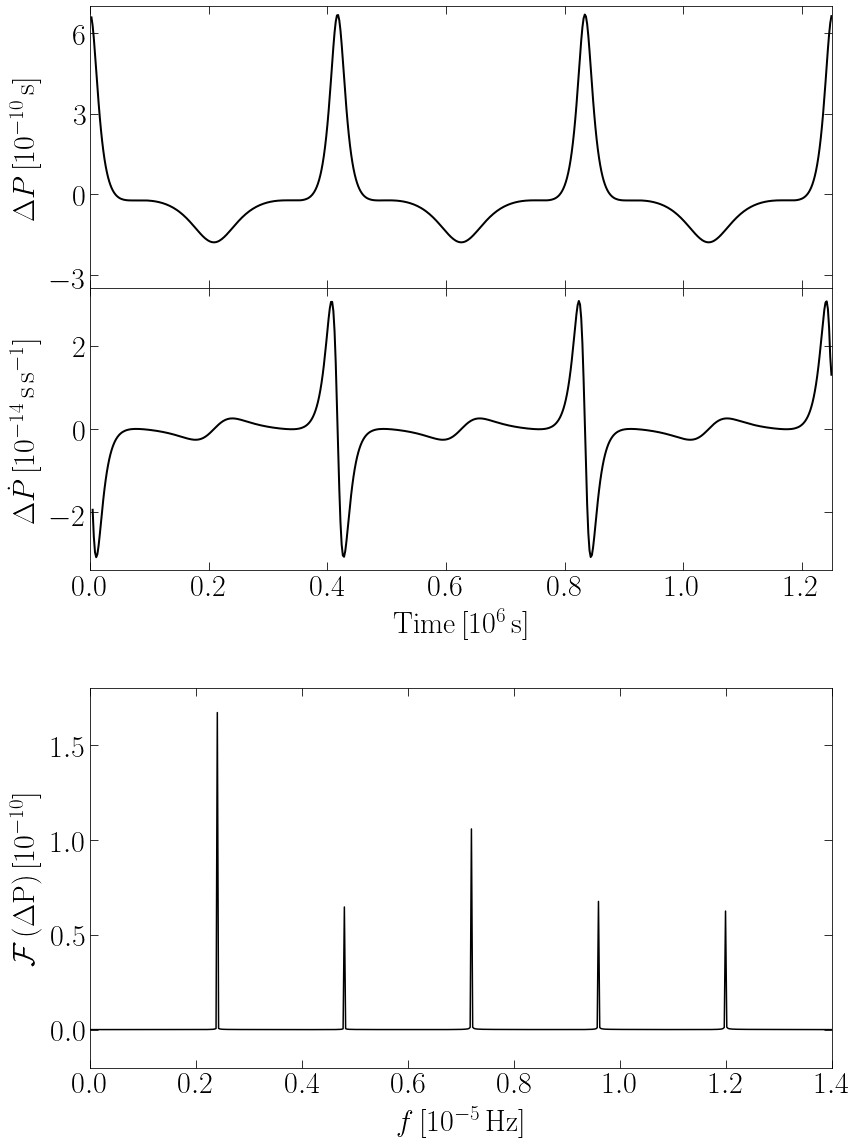

<Figure size 864x720 with 0 Axes>

In [9]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import MultipleLocator
import numpy as np
import matplotlib.pyplot as plt
y_major_locator1=MultipleLocator(3.0)
y_major_locator2=MultipleLocator(2)
y_major_locator3=MultipleLocator(1)

gs_top = plt.GridSpec(3, 1, hspace=0.0,height_ratios=[1.7,1.7, 3])
gs_base = plt.GridSpec(3, 1,height_ratios=[2,2, 3],hspace=0.3)
fig = plt.figure(figsize=(12,16))


topax = fig.add_subplot(gs_top[0,:])
other_axes = [fig.add_subplot(gs_top[i,:], sharex=topax) for i in range(1,2 )]
top_axes = [topax] + other_axes

data3 = np.genfromtxt('data/timing_large.dat')
t=data3[:,0]
hp1=data3[:,1]
dot1 = np.gradient(hp1)/np.gradient(t)
top_axes[0].plot(t/1e6, hp1/1e-10, linewidth=2,color='k')
top_axes[0].set_ylabel(r'$\Delta P\,[10^{-10}\,\rm{ s}]$',fontsize=30)
top_axes[0].tick_params(labelsize=30)
top_axes[0].yaxis.set_major_locator(y_major_locator1)
top_axes[0].set_ylim(-3.5,7)

top_axes[1].plot(t/1e6, dot1/1e-14, linewidth=2, color="k")
top_axes[1].set_ylabel(r'$\Delta \dot{P}\,[10^{-14} \, {\rm s\,s^{-1}}]$',fontsize=30)
top_axes[1].tick_params(labelsize=30)
top_axes[1].set_xlabel(r'$\rm{Time\,[10^{6}\,s]}$',fontsize=30)
top_axes[1].yaxis.set_major_locator(y_major_locator2)
top_axes[1].set_xlim(0,1.25168)

bottomax = fig.add_subplot(gs_base[2,:]) 
data = np.genfromtxt('data/timing_large_FFT.dat')
t=data[:,0]
hp3=data[:,1]

hp=np.nan_to_num(hp3)

fft_hp = fft(hp)

n1=len(t)
T=t[-1]/(n1-1)
plt.figure(figsize=(12,10))
xf= np.linspace(0.0, 1.0/(2.0*T), n1//2)
ps = 2.0/n1 * np.abs(fft_hp[0:n1//2])

bottomax.plot(xf/1e-5, ps/1e-10, color='k')
# plt.semilogy(xf, ps1)
bottomax.set_xlabel(r'$f\,[10^{-5}\,\rm{Hz}]$',fontsize=30)
bottomax.set_ylabel(r'$\rm{\mathcal{F}\,(\Delta P)\,[10^{-10}]}$',fontsize=30)
bottomax.set_xlim(0,1.4)
bottomax.set_ylim(-0.20,1.8)
bottomax.tick_params(labelsize=30)
bottomax.yaxis.set_major_locator(y_major_locator3)
bottomax.set_yticks([0,0.5,1.0,1.5])
# Hide shared x-tick labels
for ax in top_axes[:-1]:
    plt.setp(ax.get_xticklabels(), visible=False)

fig.align_labels()
fig.tight_layout(rect=[0.0,0.05,0.98,0.99]) 
# fig.tight_layout(pad=0)
plt.savefig("image/timing_large.pdf", format='pdf')
with PdfPages('image/timing_large.pdf') as pdf:
    pdf.savefig(fig)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


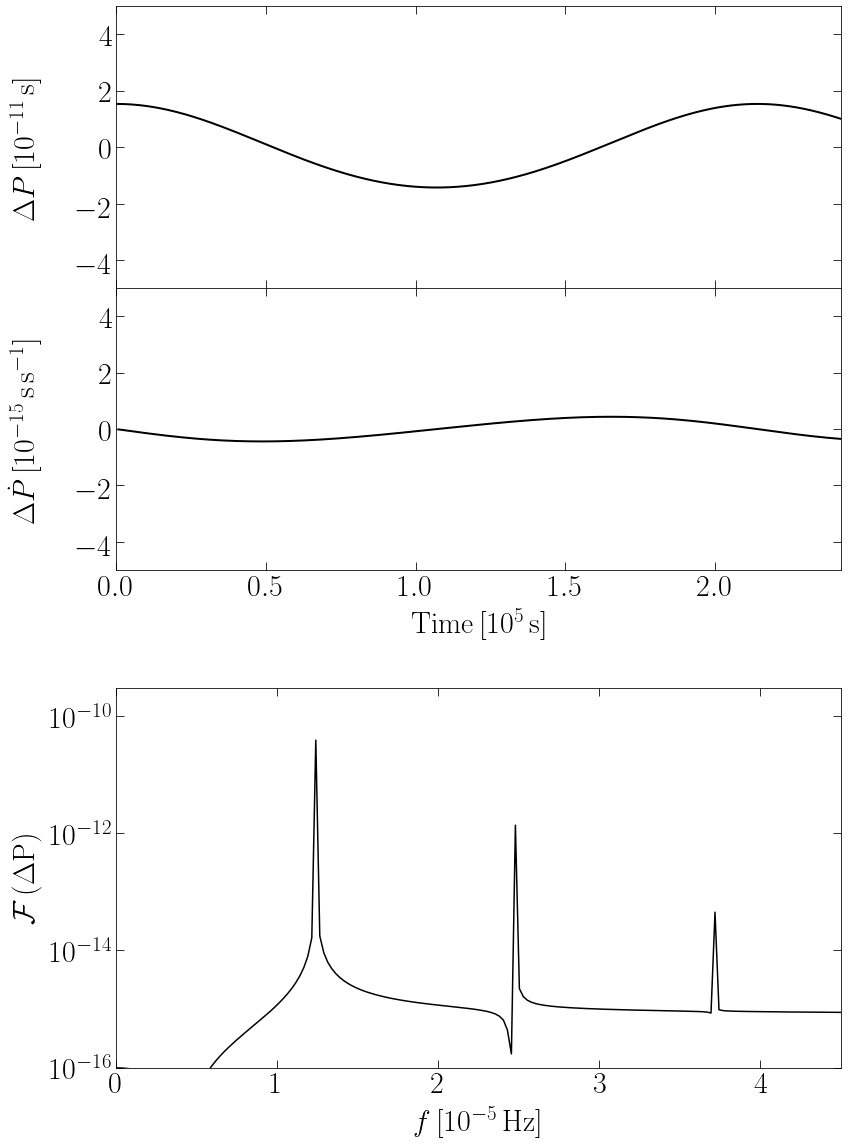

<Figure size 864x720 with 0 Axes>

In [10]:
from matplotlib.pyplot import MultipleLocator
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
y_major_locator1=MultipleLocator(1)
y_major_locator2=MultipleLocator(3)
x_major_locator3=MultipleLocator(0.5)

gs_top = plt.GridSpec(3, 1, hspace=0.0,height_ratios=[1.7,1.7, 3])
gs_base = plt.GridSpec(3, 1,height_ratios=[2,2, 3],hspace=0.3)
fig = plt.figure(figsize=(12,16))


topax = fig.add_subplot(gs_top[0,:])
other_axes = [fig.add_subplot(gs_top[i,:], sharex=topax) for i in range(1,2 )]
top_axes = [topax] + other_axes

data3 = np.genfromtxt('data/timing_small.dat')
t=data3[:,0]
hp1=data3[:,1]
dot1 = np.gradient(hp1)/np.gradient(t)
top_axes[0].plot(t/1e5, hp1/1e-11, linewidth=2,color='k')
top_axes[0].set_ylabel(r'$\Delta P\,[10^{-11}\,\rm{ s}]$',fontsize=30)
top_axes[0].tick_params(labelsize=30)
top_axes[0].yaxis.set_major_locator(y_major_locator1)
top_axes[0].set_ylim(-2.3,2.3)

top_axes[1].plot(t/1e5, dot1/1e-16, linewidth=2, color="k")
top_axes[1].set_ylabel(r'$\Delta \dot{P}\,[10^{-16}\,\rm{s\,s^{-1}}]$',fontsize=30)
top_axes[1].tick_params(labelsize=30)
top_axes[1].set_xlabel(r'$\rm{Time\,[10^{5}\,s]}$',fontsize=30)

top_axes[1].set_ylim(-7,7)
top_axes[1].yaxis.set_major_locator(y_major_locator2)
top_axes[1].set_xlim(0,6.422)

bottomax = fig.add_subplot(gs_base[2,:]) 
data = np.genfromtxt('data/timing_small_FFT.dat')
t=data[:,0]
hp3=data[:,1]
hp4=data[:,2]
hp=np.nan_to_num(hp3)
hp1=np.nan_to_num(hp4)
fft_hp = fft(hp)
fft_hp1=fft(hp1)
n1=len(t)
T=t[-1]/(n1-1)
plt.figure(figsize=(12,10))
xf= np.linspace(0.0, 1.0/(2.0*T), n1//2)
ps = 2.0/n1 * np.abs(fft_hp[0:n1//2])
ps1= 2.0/n1 * np.abs(fft_hp1[0:n1//2])
bottomax.semilogy(xf/1e-5, ps, color='k')
# plt.semilogy(xf, ps1)
bottomax.set_xlabel(r'$f\,[10^{-5}\,\rm{Hz}]$',fontsize=30)
bottomax.set_ylabel(r'$\rm{\mathcal{F}\,(\Delta P)}$',fontsize=30)
bottomax.set_xlim(0,1.7)
bottomax.set_ylim(0.4*1e-16,3*1e-10)
bottomax.tick_params(labelsize=30)
bottomax.xaxis.set_major_locator(x_major_locator3)
# Hide shared x-tick labels
for ax in top_axes[:-1]:
    plt.setp(ax.get_xticklabels(), visible=False)

fig.align_labels()
fig.tight_layout(rect=[0.0,0.05,0.99,0.99]) 
plt.savefig("image/timing_small.pdf", format='pdf', bbox_inches="tight")
with PdfPages('image/timing_small.pdf') as pdf:
    pdf.savefig(fig)

In [1]:
5//3

1